In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#EDA
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# le=le.fit_transform(data['Species'])
# df=pd.DataFrame(le)
data["Species"]=le.fit_transform(data['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


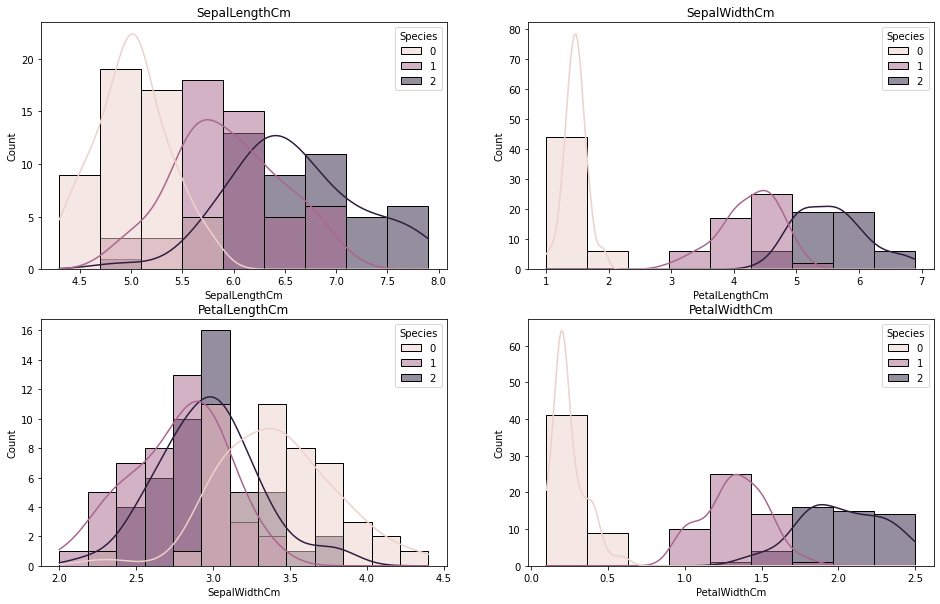

In [4]:
# plt.figure(figsize=(12,0))
# plt.subplot(1,4,1)
# sns.histplot(data=data, x="SepalLengthCm", hue="Species",kde=True)
fid,axs=plt.subplots(2,2,figsize=(16,10))
for i,feature in enumerate(data.columns[1:5]):
    sns.histplot(data=data, x=feature, hue="Species",kde=True,ax=axs[i%2,i//2])
    axs[i//2,i%2].set_title(feature)

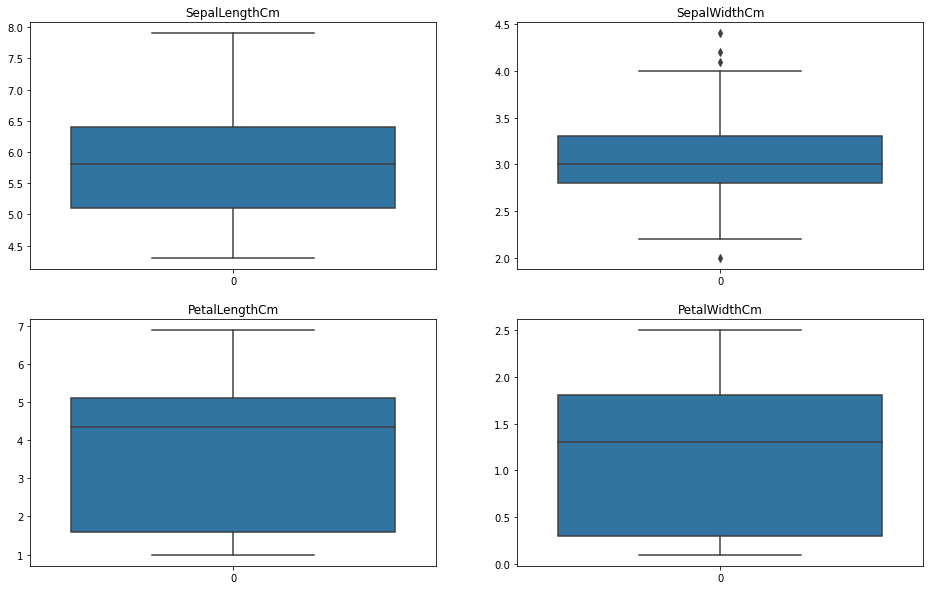

In [5]:
fig,axs=plt.subplots(2,2,figsize=(16,10))
for i,feature in enumerate(data.columns[1:5]):
    sns.boxplot(data[feature],ax=axs[i//2,i%2])
    axs[i//2,i%2].set_title(feature)

<AxesSubplot:xlabel='Species', ylabel='count'>

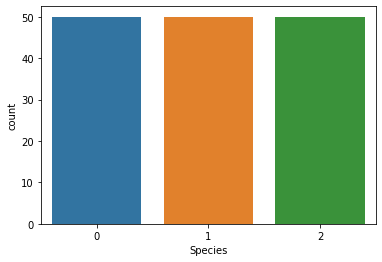

In [38]:
sns.countplot(data=data,x='Species')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

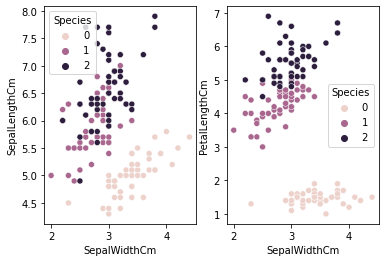

In [47]:
plt.subplot(1,2,1)
sns.scatterplot(x=data['SepalWidthCm'],y=data['SepalLengthCm'],hue=data['Species'])

plt.subplot(1,2,2)
sns.scatterplot(x=data['SepalWidthCm'],y=data['PetalLengthCm'],hue=data['Species'])

In [51]:
# data=data.drop('Id',axis=1)
x=data.drop('Species',axis=1)
y=data['Species']

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [67]:
from sklearn.metrics import mean_absolute_error

In [68]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
dt_pred=dt.predict(x_test)

In [72]:
dt_pred

array([1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2,
       0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       1], dtype=int64)

In [85]:
np.array(y_test)

array([1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2,
       0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       1], dtype=int64)

In [86]:
print("dt:",mean_absolute_error(y_test,dt_pred))

dt: 0.0


In [88]:
x=[[1,2,3,4]]
dt_pred=dt.predict(x)

In [89]:
dt_pred

array([2], dtype=int64)